## Task 2.1

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected = True)

In [2]:
sns.set(rc={'figure.figsize':(30,10)})

In [3]:
df = pd.read_csv('../Module 1/week2.csv')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trend
0,TCS,EQ,2017-05-15,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,2017,5,0.000000,Slight or No Change
1,TCS,EQ,2017-05-16,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2017,5,2.708131,Positive
2,TCS,EQ,2017-05-17,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,2017,5,1.078567,Positive
3,TCS,EQ,2017-05-18,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20,2017,5,3.292810,Among top gainers
4,TCS,EQ,2017-05-19,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94,2017,5,-1.145414,Negative


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['Date'].dtypes

dtype('<M8[ns]')

In [6]:
df = df.set_index('Date')
df.rename_axis(None, inplace=True)
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trend
2017-05-15,TCS,EQ,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,2017,5,0.000000,Slight or No Change
2017-05-16,TCS,EQ,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2017,5,2.708131,Positive
2017-05-17,TCS,EQ,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,2017,5,1.078567,Positive
2017-05-18,TCS,EQ,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20,2017,5,3.292810,Among top gainers
2017-05-19,TCS,EQ,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94,2017,5,-1.145414,Negative


In [7]:
data = go.Scatter(x = df.index, y = df['Close Price'], name = 'train')

layout = go.Layout(dict(title = 'Close Price over Time',
                       xaxis = dict(title = 'Time'),
                       yaxis = dict(title = 'Close Price'),
                       ))
iplot(dict(data=data, layout=layout))

From the graph it can be seen that closing prices hit an all time low on May 31 2018. But there's a catch. After some research on what actually happened on 31 May 2018 I came to know that although this drop happened market value of TCS remained the same.
So what happened is that TCS announced 1:1 bonus share to all its shareholders. Bonus shares do not change the investment value one holds.<br><br>
When a bonus is issued, the share price drops, in this case by a factor of 2(1:1 bonus). So if you held TCS shares at an average price of Rs.3514, the price of each share after bonus would adjust to 3514/2 = Rs.1757. You will receive 1 share at Rs.0 for every 1 share you hold.So earlier you were holding 1 share worth Rs.3514. now you will hold 2 shares worth Rs.3514 (₹1757 each). This is the concept of bonus shares.<br><br>
A bonus issue only increases liquidity and not your investment value.

## Task 2.2

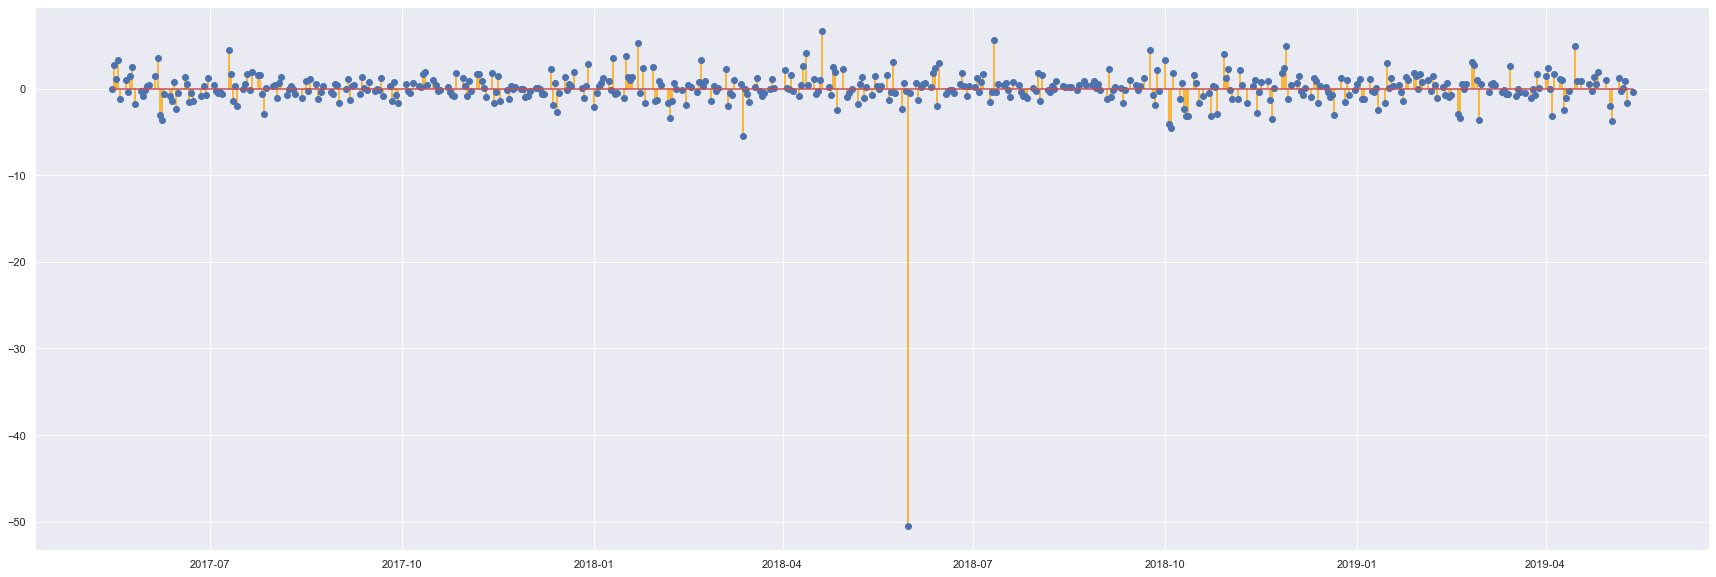

In [8]:
plt.stem(df.index,df['Day_Perc_Change'], use_line_collection=True,linefmt='orange');

## Task 2.3

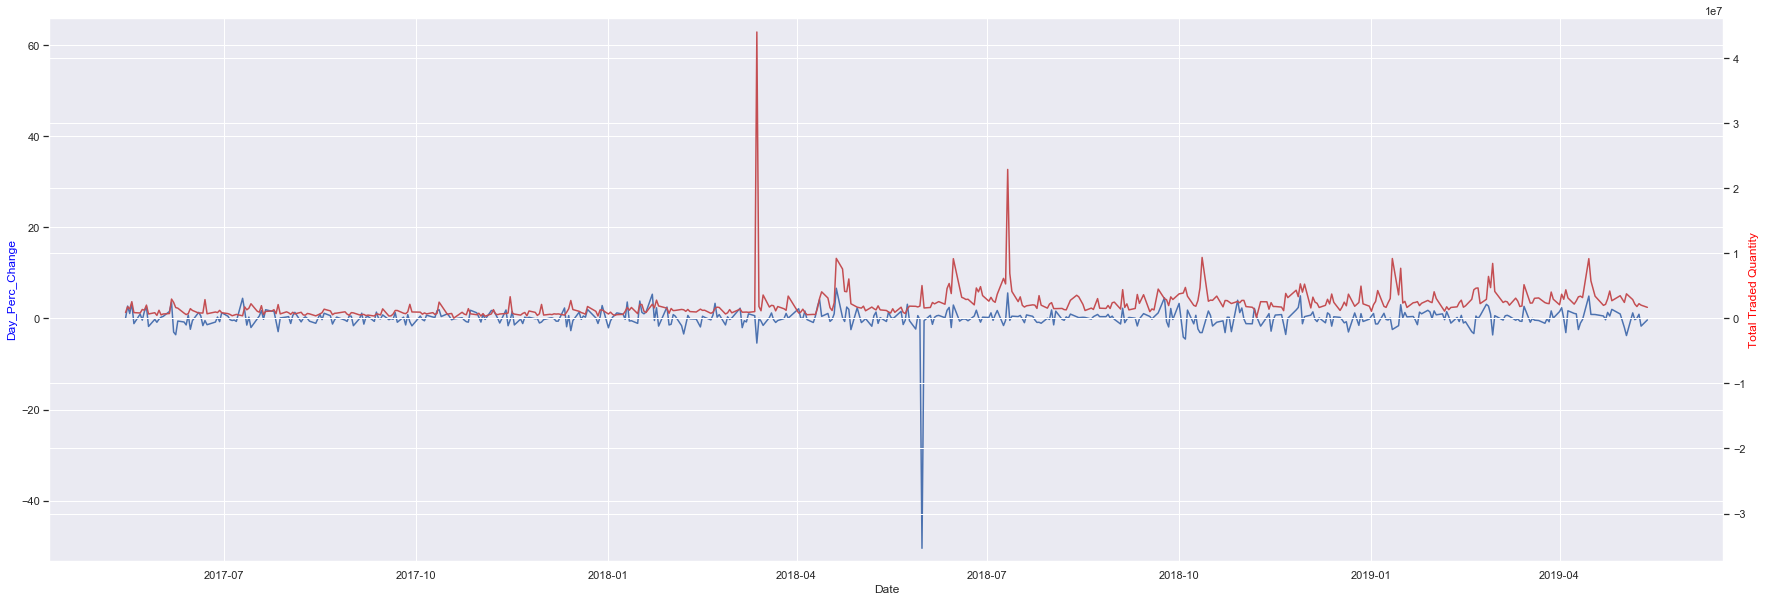

In [9]:
# https://stackoverflow.com/a/26456731/11899593

def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    adjust_yaxis(ax2,(y1-y2)/2,v2)
    adjust_yaxis(ax1,(y2-y1)/2,v1)

def adjust_yaxis(ax,ydif,v):
    """shift axis ax by ydiff, maintaining point v at the same location"""
    inv = ax.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, ydif))
    miny, maxy = ax.get_ylim()
    miny, maxy = miny - v, maxy - v
    if -miny>maxy or (-miny==maxy and dy > 0):
        nminy = miny
        nmaxy = miny*(maxy+dy)/(miny+dy)
    else:
        nmaxy = maxy
        nminy = maxy*(miny+dy)/(maxy+dy)
    ax.set_ylim(nminy+v, nmaxy+v)
    
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax1.set_xlabel('Date')
ax2.set_ylabel('Total Traded Quantity', color='red')
ax2.plot(df['Total Traded Quantity'], 'r-')
ax1.plot(df['Day_Perc_Change'], 'b-')
ax1.set_ylabel('Day_Perc_Change', color='blue')

align_yaxis(ax1, 0, ax2, 0)


In [10]:
df.nlargest(3, ['Total Traded Quantity']).index

DatetimeIndex(['2018-03-13', '2018-07-11', '2018-10-12'], dtype='datetime64[ns]', freq=None)

The huge spike in Total Traded Quantity on 13th March 2018 is attributed to Tata Sons selling 1.48% in TCS for Rs 8,127 crore to purchase two steel firms — Bhushan Steel and Bhushan Steel and Power which had total debt of Rs 60,000 crore. Tata Sons also had to repay debt of around Rs 35,000 crore owed by Tata Teleservices.

https://economictimes.indiatimes.com/markets/stocks/news/tata-sons-sells-1-48-in-tcs-for-rs-8127-crore-may-use-some-funds-to-retire-debts/articleshow/63275964.cms

The second big spike is on 11th July 2018. Shares of Tata Consultancy Services surged 5.5 per cent, adding Rs 39,281.74 crore to its market valuation, after the company posted better-than-expected quarterly earnings.<br>
In terms of equity volume, 11.57 lakh shares of the company were traded on BSE and over 2 crore shares changed hands at NSE during the day.

https://economictimes.indiatimes.com/markets/stocks/news/tcs-stock-surges-5-5-m-cap-zooms-rs-39282-cr-post-q1-earnings/articleshow/64949956.cms

## Task 2.4

In [11]:
df['Trend'].value_counts()

Slight or No Change    180
Positive                96
Negative                75
Slight positive         57
Slight negative         54
Among top gainers       18
Among top losers        13
Bear drop                1
Name: Trend, dtype: int64

In [12]:
sns.set(rc={'figure.figsize':(20,10)})

In [13]:
def plot_pie_graph(column_name):
    labels = column_name.astype('category').cat.categories.tolist()
    counts = column_name.value_counts()
    colors = ['#ffadad','#ffd6a5','#fdffb6','#caffbf','#9bf6ff','#a0c4ff','#bdb2ff','#ffc6ff','#fffffc']
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True,colors=colors) 
    ax1.axis('equal')
    ax1.legend()
    plt.title('Frequency Distribution of {} using Pie Chart'.format(column_name.name))
    plt.show()
    

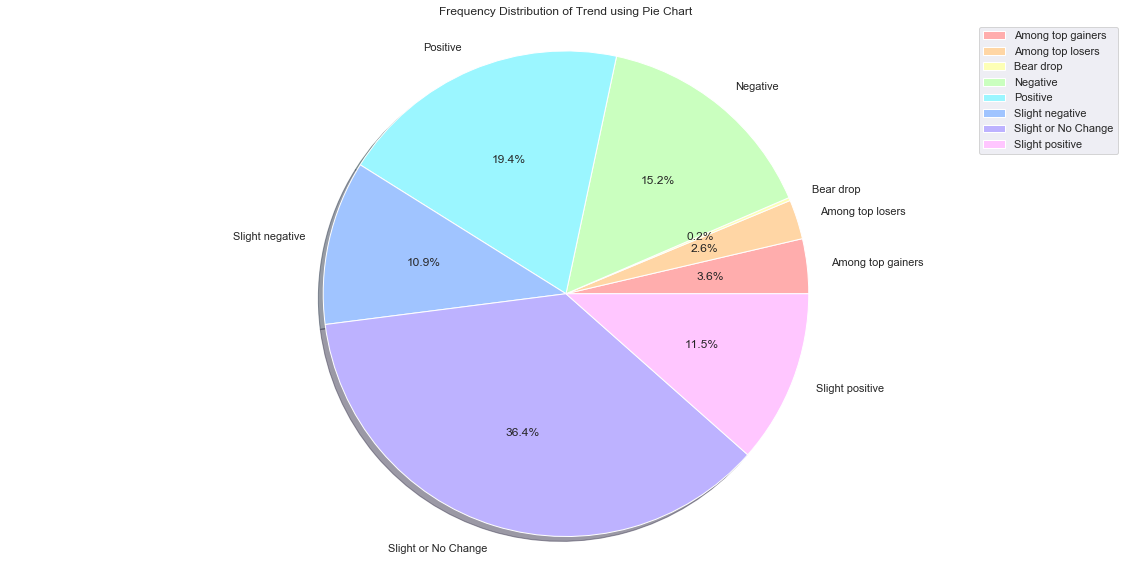

In [14]:
plot_pie_graph(df['Trend'])

In [15]:
df['Total Traded Quantity'].groupby(df['Trend']).mean()

Trend
Among top gainers      4.706883e+06
Among top losers       7.492338e+06
Bear drop              5.049371e+06
Negative               1.975849e+06
Positive               2.302947e+06
Slight negative        1.690573e+06
Slight or No Change    1.687568e+06
Slight positive        1.981558e+06
Name: Total Traded Quantity, dtype: float64

In [16]:
df['Total Traded Quantity'].groupby(df['Trend']).median()

Trend
Among top gainers      2954120
Among top losers       4397518
Bear drop              5049371
Negative               1742213
Positive               1910952
Slight negative        1576520
Slight or No Change    1375582
Slight positive        1762656
Name: Total Traded Quantity, dtype: int64

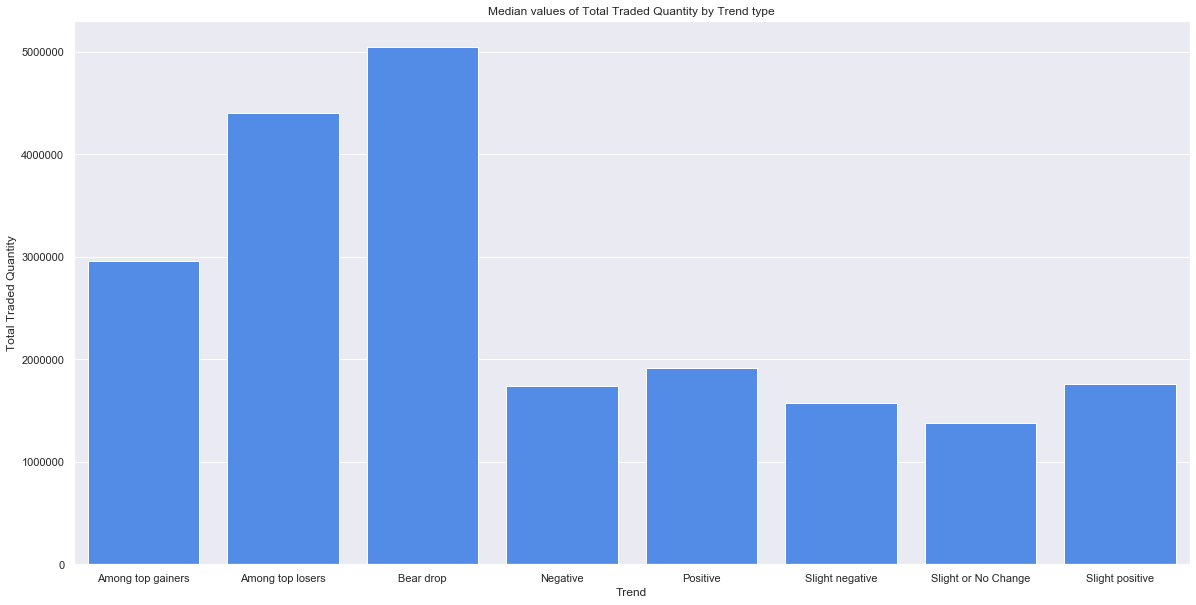

In [17]:
sns.barplot(x="Trend", y="Total Traded Quantity", data =df.groupby(['Trend'], as_index=False).median(), color='#3a86ff')
plt.title("Median values of Total Traded Quantity by Trend type");

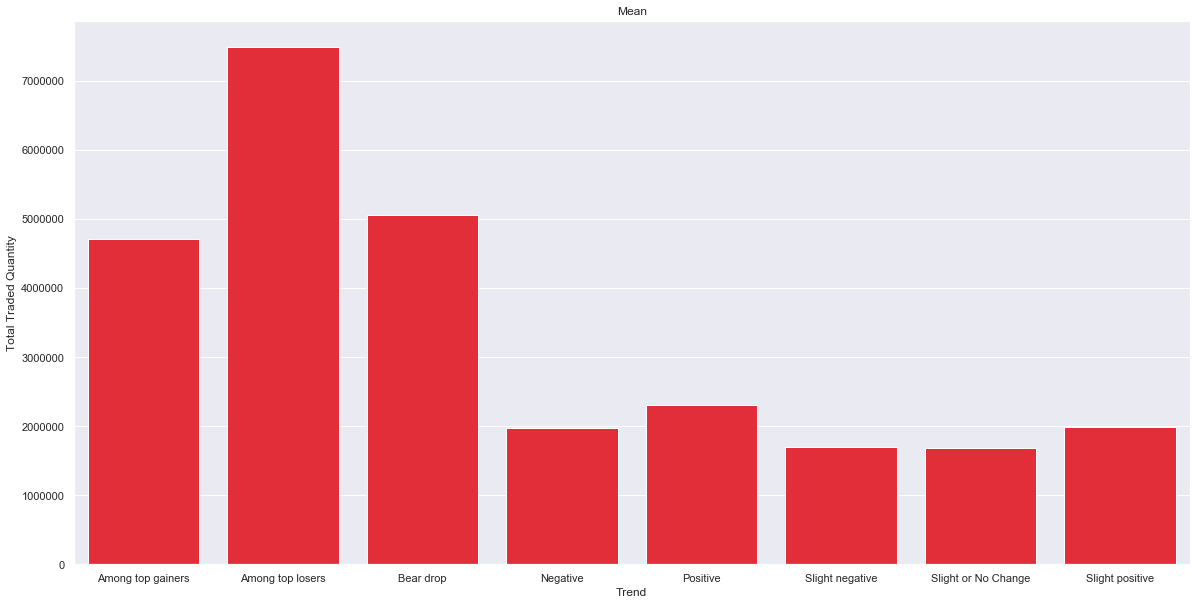

In [18]:
sns.barplot(x="Trend", y="Total Traded Quantity", data =df.groupby(['Trend'], as_index=False).mean(), color='#FF101F')
plt.title("Mean");

## Task 2.5

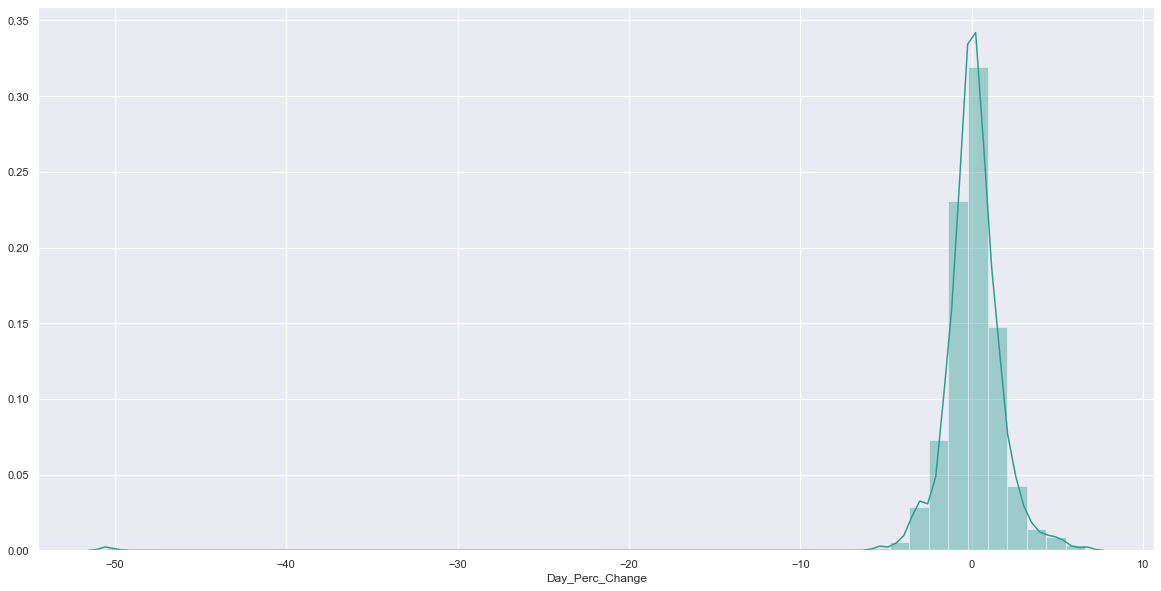

In [19]:
sns.distplot(df['Day_Perc_Change'], color="#2a9d8f");

## Task 2.6

In [20]:
df_bf = pd.read_csv('../Stocks/Large_Cap/BAJFINANCE.csv')
df_ap = pd.read_csv('../Stocks/Large_Cap/ASIANPAINT.csv')
df_g = pd.read_csv('../Stocks/Large_Cap/GAIL.csv')
df_h = pd.read_csv('../Stocks/Large_Cap/HDFC.csv')
df_m = pd.read_csv('../Stocks/Large_Cap/MARUTI.csv')

In [21]:
df_ap.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ASIANPAINT,EQ,15-May-2017,1132.95,1142.90,1149.9,1135.00,1149.90,1148.05,1145.57,729473,8.356654e+08,20868,471377,64.62
1,ASIANPAINT,EQ,16-May-2017,1148.05,1148.90,1149.7,1129.60,1143.50,1142.85,1137.20,913600,1.038946e+09,35436,641893,70.26
2,ASIANPAINT,EQ,17-May-2017,1142.85,1143.00,1159.0,1136.55,1156.75,1154.95,1149.76,579709,6.665239e+08,24824,282528,48.74
3,ASIANPAINT,EQ,18-May-2017,1154.95,1147.15,1159.8,1140.00,1154.80,1151.35,1149.89,702003,8.072265e+08,23468,436095,62.12
4,ASIANPAINT,EQ,19-May-2017,1151.35,1139.85,1144.8,1098.80,1131.00,1123.15,1124.84,1732673,1.948986e+09,87720,1021656,58.96


In [22]:
df_bf.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BAJFINANCE,EQ,15-May-2017,1314.75,1323.0,1348.5,1317.65,1332.0,1332.95,1335.96,634195,8.472579e+08,16701,188623,29.74
1,BAJFINANCE,EQ,16-May-2017,1332.95,1337.4,1358.8,1327.20,1346.0,1347.75,1344.96,788530,1.060542e+09,22552,274106,34.76
2,BAJFINANCE,EQ,17-May-2017,1347.75,1350.0,1374.0,1297.50,1320.0,1324.80,1343.51,2408302,3.235570e+09,67508,468034,19.43
3,BAJFINANCE,EQ,18-May-2017,1324.80,1299.0,1343.0,1296.05,1310.7,1314.55,1325.97,1210985,1.605728e+09,34422,305579,25.23
4,BAJFINANCE,EQ,19-May-2017,1314.55,1324.0,1333.9,1265.55,1288.0,1289.15,1295.81,1167010,1.512226e+09,32394,346261,29.67


In [23]:
df_g.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,GAIL,EQ,15-May-2017,409.20,413.05,415.25,410.00,413.80,414.00,412.83,1077551,4.448488e+08,22153,459059,42.60
1,GAIL,EQ,16-May-2017,414.00,415.80,416.00,410.25,411.00,411.40,412.85,2434834,1.005216e+09,46472,1771251,72.75
2,GAIL,EQ,17-May-2017,411.40,411.50,412.90,405.60,408.50,408.30,408.42,2002105,8.177070e+08,48972,1405319,70.19
3,GAIL,EQ,18-May-2017,408.30,406.35,409.00,401.50,403.00,404.75,407.03,2132140,8.678451e+08,39137,1405640,65.93
4,GAIL,EQ,19-May-2017,404.75,404.00,406.35,396.00,401.35,401.05,400.31,2847835,1.140022e+09,64928,1922275,67.50


In [24]:
df_h.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HDFC,EQ,15-May-2017,1549.80,1554.50,1572.60,1554.10,1561.0,1559.50,1562.62,1270297,1.984990e+09,59917,955875,75.25
1,HDFC,W2,15-May-2017,204.45,217.95,217.95,205.00,205.0,205.00,209.50,29200,6.117400e+06,4,29200,100.00
2,HDFC,EQ,16-May-2017,1559.50,1558.00,1569.00,1554.00,1568.0,1566.55,1564.05,2114918,3.307844e+09,79354,1652379,78.13
3,HDFC,EQ,17-May-2017,1566.55,1565.50,1570.95,1549.75,1550.1,1552.50,1557.08,2161434,3.365526e+09,80317,1794472,83.02
4,HDFC,W2,17-May-2017,205.00,204.95,207.00,204.95,207.0,207.00,205.75,73000,1.501938e+07,10,73000,100.00


In [25]:
df_m.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,MARUTI,EQ,15-May-2017,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01
1,MARUTI,EQ,16-May-2017,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97
2,MARUTI,EQ,17-May-2017,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37
3,MARUTI,EQ,18-May-2017,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44
4,MARUTI,EQ,19-May-2017,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49


In [26]:
df_list = [df_ap,df_bf,df_g,df_h,df_m]
for df_x in df_list:
    df_x['Series'] = df_x['Series'][df_x['Series'] == 'EQ']
    df_x.dropna(inplace = True)
    df_x['Date'] = df_x['Date'].astype('datetime64')
    df_x.set_index(['Date'],inplace = True)

In [27]:
Close_Price_df = pd.DataFrame({'ASIAN_PAINT':df_ap['Close Price'],'BAJAJ_FINANCE':df_bf['Close Price'],
                               'GAIL':df_g['Close Price'],'HDFC':df_h['Close Price'],'MARUTI':df_m['Close Price']})
Close_Price_df.head()

,ASIAN_PAINT,BAJAJ_FINANCE,GAIL,HDFC,MARUTI
Date,,,,,
2017-05-15,1148.05,1332.95,414.00,1559.50,6823.90
2017-05-16,1142.85,1347.75,411.40,1566.55,6953.95
2017-05-17,1154.95,1324.80,408.30,1552.50,6958.20
2017-05-18,1151.35,1314.55,404.75,1537.05,6831.05
2017-05-19,1123.15,1289.15,401.05,1520.60,6790.55


In [28]:
CP_df_PC = Close_Price_df.pct_change()*100
CP_df_PC = CP_df_PC.dropna()

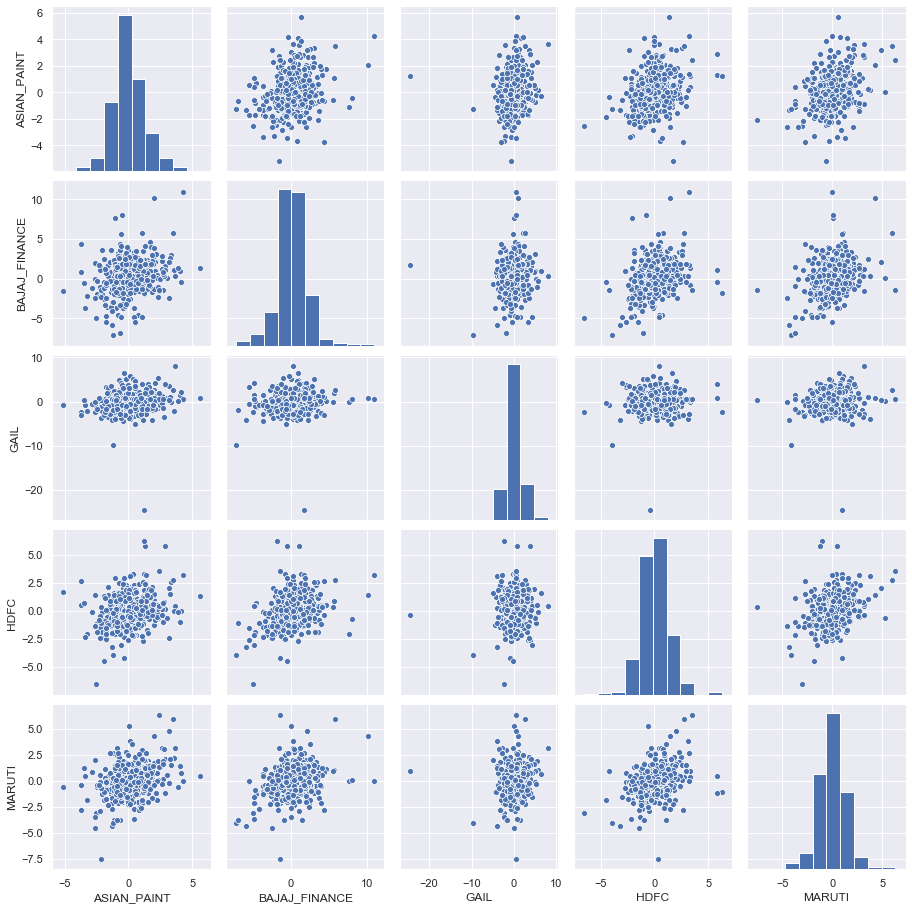

In [29]:
sns.pairplot(CP_df_PC);

## Task 2.7

In [30]:
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trend
2017-05-15,TCS,EQ,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,2017,5,0.000000,Slight or No Change
2017-05-16,TCS,EQ,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2017,5,2.708131,Positive
2017-05-17,TCS,EQ,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,2017,5,1.078567,Positive
2017-05-18,TCS,EQ,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20,2017,5,3.292810,Among top gainers
2017-05-19,TCS,EQ,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94,2017,5,-1.145414,Negative


In [31]:
df['Day_Perc_Change'].rolling(7).std()

2017-05-15         NaN
2017-05-16         NaN
2017-05-17         NaN
2017-05-18         NaN
2017-05-19         NaN
                ...   
2019-05-07    2.024204
2019-05-08    2.003651
2019-05-09    1.838077
2019-05-10    1.778267
2019-05-13    1.701184
Name: Day_Perc_Change, Length: 494, dtype: float64

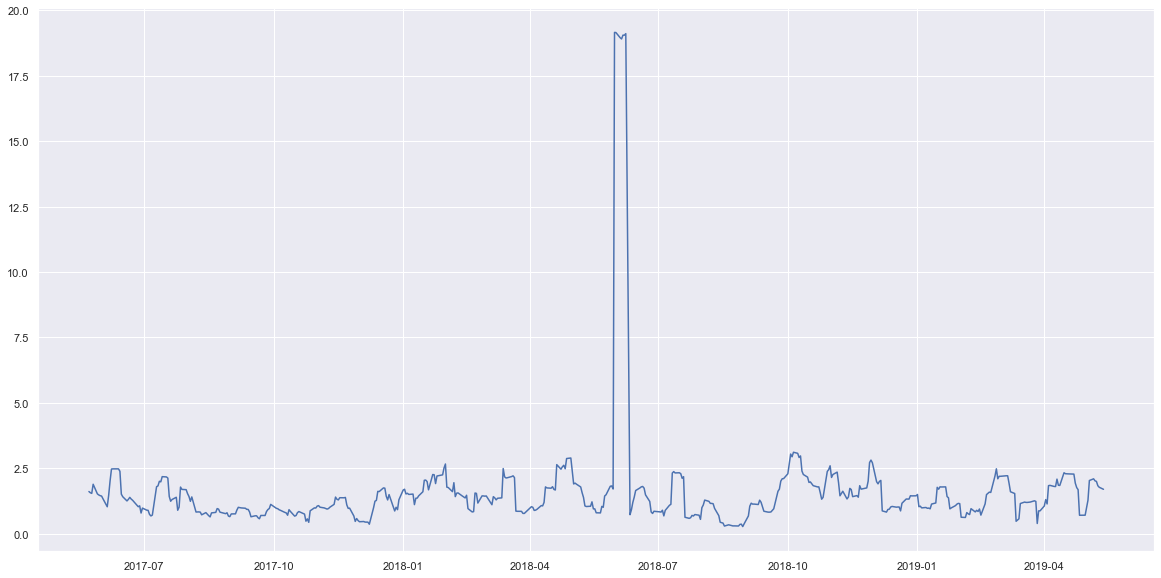

In [32]:
plt.plot(df.index,df['Day_Perc_Change'].rolling(7).std())
plt.show()

## Task 2.8

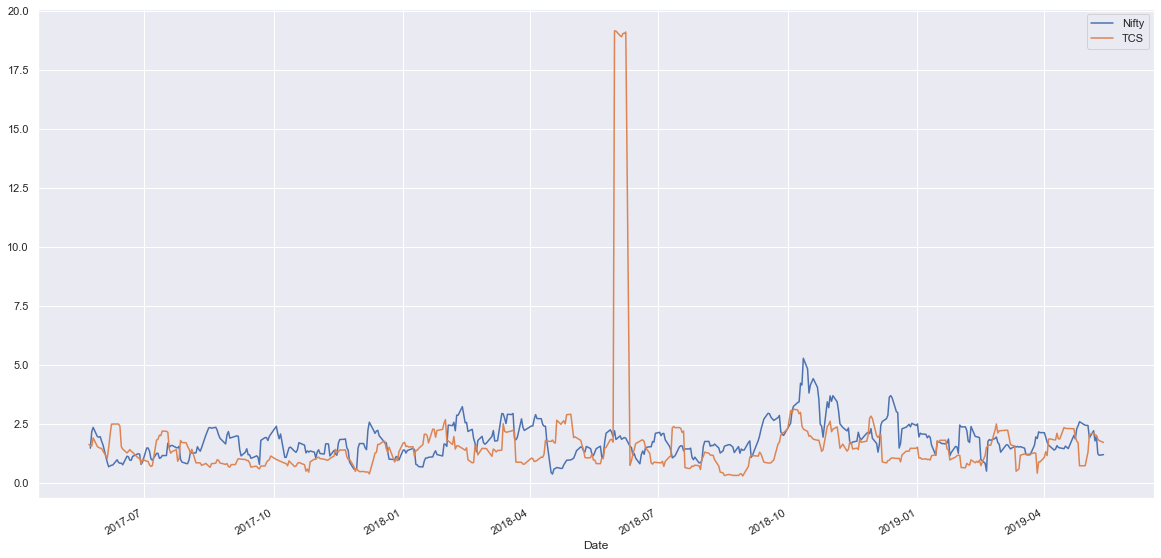

In [33]:
df_Nifty = pd.read_csv("../Stocks/Nifty50/Nifty50.csv")
df_Nifty['Date'] = df_Nifty['Date'].astype('datetime64')
df_Nifty.set_index('Date',inplace = True)
df_Nifty_ClsPrc = df_Nifty['Close'].pct_change()*100
vol2 = df_Nifty_ClsPrc.rolling(7).std() * np.sqrt(7)
plt.figure()
vol2.plot(label = "Nifty")
plt.plot(df['Day_Perc_Change'].rolling(7).std(),label = "TCS")
plt.legend()
plt.show()

## Task 2.9

In [34]:
Day21_avg = df['Average Price'].rolling(21).mean()
Day34_avg = df['Average Price'].rolling(34).mean()
s1 = pd.Series(df['Average Price'], name='Average Price')
s2=pd.Series(Day21_avg,name='21_day_MA')
s3=pd.Series(Day34_avg ,name='34_day_MA')
new_df = pd.concat([s1,s2,s3], axis=1)
new_df

,Average Price,21_day_MA,34_day_MA
2017-05-15,2352.60,NaN,NaN
2017-05-16,2410.26,NaN,NaN
2017-05-17,2443.31,NaN,NaN
2017-05-18,2525.78,NaN,NaN
2017-05-19,2506.58,NaN,NaN
...,...,...,...
2019-05-07,2163.53,2124.047143,2080.322059
2019-05-08,2151.85,2127.760952,2085.044706
2019-05-09,2166.98,2133.818571,2088.779118
2019-05-10,2161.83,2139.753810,2092.567647


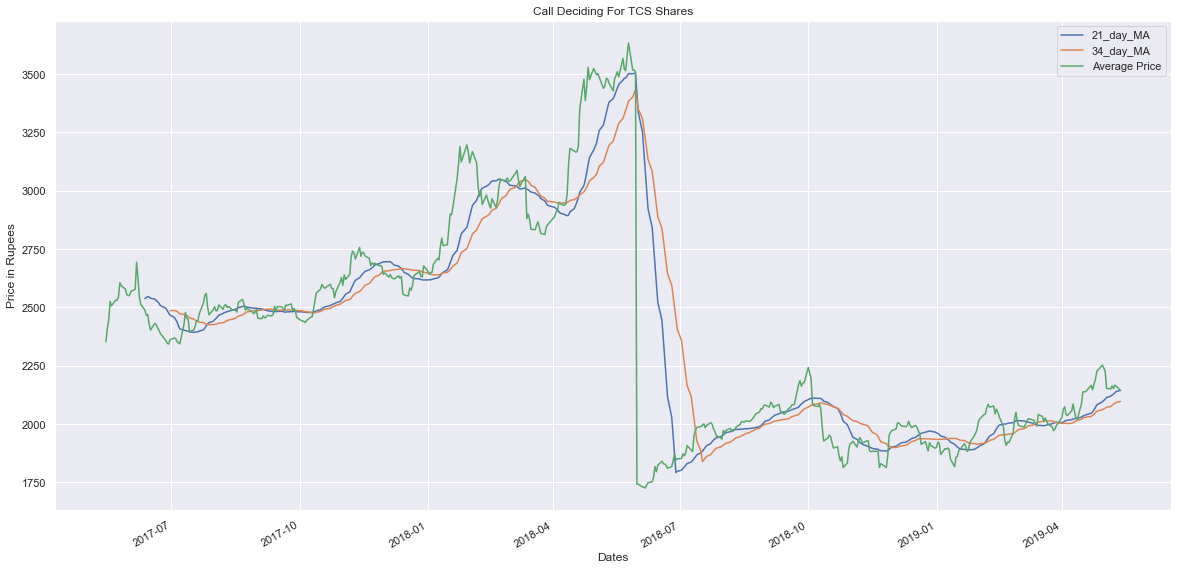

In [35]:
new_df[['21_day_MA','34_day_MA']].plot()
df['Average Price'].plot(label = "Average Price")
plt.ylabel("Price in Rupees")
plt.xlabel('Dates')
plt.title("Call Deciding For TCS Shares")
plt.grid(True)
plt.legend()
plt.show()

Now, let's make Trade Calls.<br>
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 

In [36]:
prev_index       = new_df.index[0]
prev_row         = new_df[:prev_index]
ma_relation = prev_row["21_day_MA"][0] > prev_row["34_day_MA"][0]
new_df['Trade_Call'] = 'None'

BUY, SELL = [], []

for index, row in new_df.iterrows():
    if row["21_day_MA"] and row["34_day_MA"]:    
        if ma_relation and row["21_day_MA"] < row["34_day_MA"]:
            result = "SELL"
            SELL.append(index)
        elif not ma_relation and row["21_day_MA"] > row["34_day_MA"]:
            result = "BUY"
            BUY.append(index)
        else:
            result = "None" 
        new_df.at[index, 'Trade_Call'] = result
        ma_relation = row["21_day_MA"] > row["34_day_MA"]                        
    
calls = new_df[["Average Price", "21_day_MA", "34_day_MA", "Trade_Call"]][ new_df['Trade_Call'] != "None" ]
calls

,Average Price,21_day_MA,34_day_MA,Trade_Call
2017-07-27,2499.85,2428.464286,2427.312059,BUY
2017-09-06,2454.77,2488.905238,2491.074706,SELL
2017-10-10,2459.75,2478.008571,2476.653824,BUY
2017-12-13,2632.07,2666.648095,2666.807059,SELL
2018-01-12,2764.28,2650.486667,2647.568235,BUY
2018-03-06,3087.33,3017.850476,3023.822941,SELL
2018-04-20,3351.07,2992.980952,2982.012647,BUY
2018-06-01,1742.29,3334.816667,3350.294118,SELL
2018-07-17,1994.60,1883.500952,1838.641765,BUY
2018-10-22,1903.03,2067.121429,2068.734118,SELL


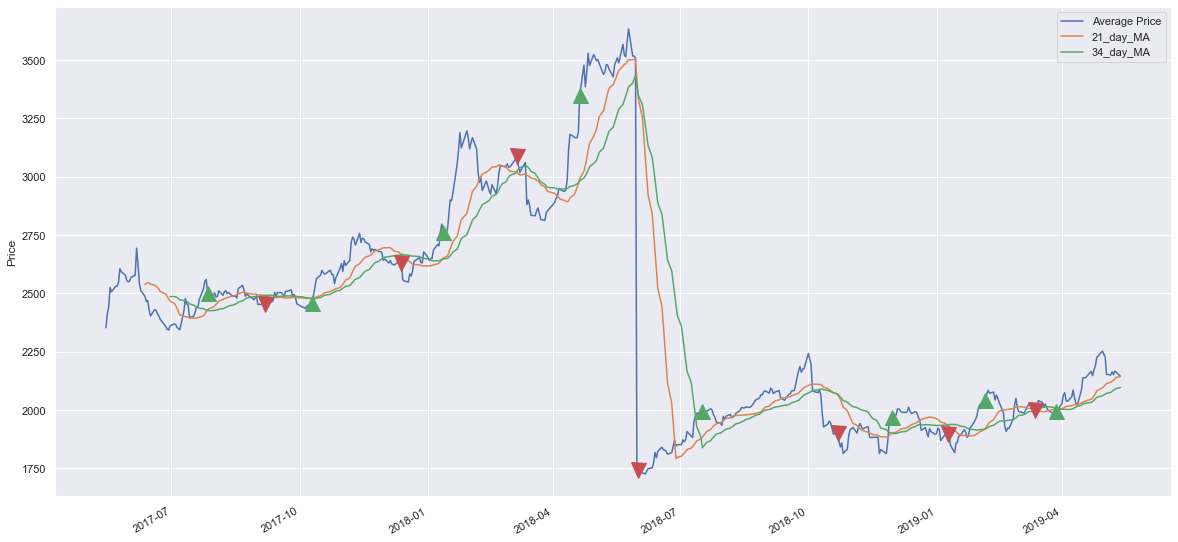

In [37]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, ylabel="Price")

new_df[["Average Price", "21_day_MA", "34_day_MA"]].plot(ax=ax1)

ax1.plot( new_df["Average Price"][ new_df['Trade_Call'] == 'BUY' ].index, 
          new_df["Average Price"][ new_df['Trade_Call'] == 'BUY' ], 
          '^', markersize=15, color='g' )

ax1.plot( new_df["Average Price"][ new_df['Trade_Call'] == 'SELL' ].index, 
          new_df["Average Price"][ new_df['Trade_Call'] == 'SELL' ], 
          'v', markersize=15, color='r' );

In [38]:
print("As shown by Green Markers")
for b in BUY:
    print("BUY on", str(b).split(" ")[0])  

As shown by Green Markers
BUY on 2017-07-27
BUY on 2017-10-10
BUY on 2018-01-12
BUY on 2018-04-20
BUY on 2018-07-17
BUY on 2018-11-30
BUY on 2019-02-05
BUY on 2019-03-28


In [39]:
print("As shown by Red Markers")
for s in SELL:
    print("SELL on", str(s).split(" ")[0])

As shown by Red Markers
SELL on 2017-09-06
SELL on 2017-12-13
SELL on 2018-03-06
SELL on 2018-06-01
SELL on 2018-10-22
SELL on 2019-01-09
SELL on 2019-03-13


## Task 2.10

In [40]:
df["14_day_MA"] = df['Close Price'].rolling(14).mean()
df["14_day_STD"] = df['Close Price'].rolling(14).std()
df["Upper Band"] = df["14_day_MA"] + (df["14_day_STD"] * 2)
df["Lower Band"] = df["14_day_MA"] - (df["14_day_STD"] * 2)

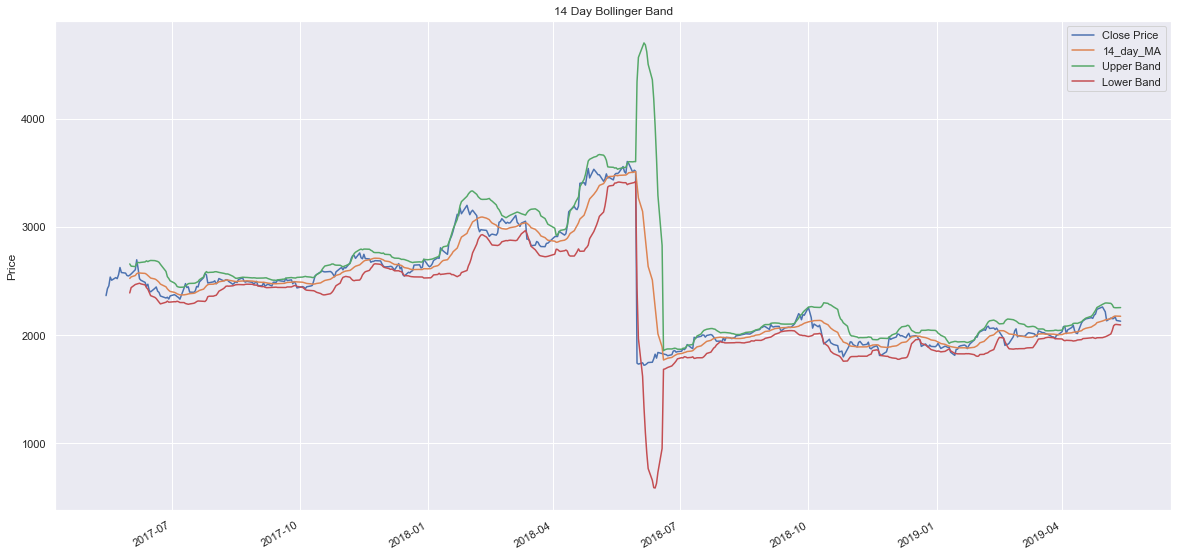

In [41]:
df[['Close Price', '14_day_MA', 'Upper Band', 'Lower Band']].plot(figsize=(20,10))
plt.title('14 Day Bollinger Band')
plt.ylabel('Price')
plt.show();

In [42]:
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trend,14_day_MA,14_day_STD,Upper Band,Lower Band
2017-05-15,TCS,EQ,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,...,712450,78.39,2017,5,0.000000,Slight or No Change,NaN,NaN,NaN,NaN
2017-05-16,TCS,EQ,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,...,1167534,64.84,2017,5,2.708131,Positive,NaN,NaN,NaN,NaN
2017-05-17,TCS,EQ,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,...,1031752,71.74,2017,5,1.078567,Positive,NaN,NaN,NaN,NaN
2017-05-18,TCS,EQ,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,...,1135613,44.20,2017,5,3.292810,Among top gainers,NaN,NaN,NaN,NaN
2017-05-19,TCS,EQ,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,...,517461,57.94,2017,5,-1.145414,Negative,NaN,NaN,NaN,NaN


In [43]:
df.to_csv('week3.csv')